# MHC II Analysis - PBMCs

In [1]:
import scanpy as sc
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from pybedtools import BedTool
import pickle as pkl
import itertools
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
import sys
sys.path.append('/home/ssm-user/Github/scrna-parameter-estimation/dist/memento-0.0.5-py3.8.egg')
sys.path.append('/home/ssm-user/Github/misc-seq/miscseq/')
import encode
import memento

In [4]:
data_path = '/data_volume/parameter_estimation/'
fig_path = '/home/ssm-user/Github/scrna-parameter-estimation/figures/fig5/supp/'

### Read PBMC data

In [5]:
adata = sc.read(data_path + 'interferon_filtered.h5ad')

In [6]:
adata.obs['q'] = 0.07

In [7]:
memento.setup_memento(adata, q_column='q', trim_percent=0.15)

### Check correlations in ctrl

In [8]:
adata_cm = adata.copy()[(adata.obs['stim']=='ctrl')].copy()
memento.create_groups(adata_cm, label_columns=['cell', 'ind'])
memento.compute_1d_moments(adata_cm, min_perc_group=.1)

# adata_ctrl = adata.copy()[(adata.obs['cell']=='B cells') & (adata.obs['stim']=='ctrl')].copy()

/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/ssm-user/Github/scrna-parameter-estimation/dist/memento-0.0.5-py3.8.egg/memento/estimator.py:105: RuntimeWarning: invalid value encountered in log


In [9]:
canonical_isgs = pd.read_csv('alpha_beta_reactome.txt', header=None)[0].tolist()
m, v, count = memento.get_1d_moments(adata_cm)
mhc_genes = m.query('gene.str.contains("HLA")', engine='python').gene.tolist()
tf_list = ['STAT1']

gene_list = adata_cm.var.index.tolist()
isgs = list(set(canonical_isgs) & set(gene_list))
target_list = list(set(isgs) | set(mhc_genes))

memento.compute_2d_moments(adata_cm, list(itertools.product(tf_list,target_list)))

/home/ssm-user/Github/scrna-parameter-estimation/dist/memento-0.0.5-py3.8.egg/memento/main.py:503: RuntimeWarning: divide by zero encountered in log


In [10]:
corr_df = memento.get_2d_moments(adata_cm, groupby='cell')

/home/ssm-user/Github/scrna-parameter-estimation/dist/memento-0.0.5-py3.8.egg/memento/main.py:594: RuntimeWarning: invalid value encountered in true_divide


In [11]:
corr_df.query('gene_2.str.contains("HLA")',engine='python')

,gene_1,gene_2,cell_CD14+ Monocytes,cell_CD4 T cells,cell_Dendritic cells,cell_NK cells,cell_CD8 T cells,cell_B cells,cell_Megakaryocytes,cell_FCGR3A+ Monocytes
3,STAT1,HLA-DPA1,0.069061,0.146106,0.182006,-0.411293,-0.242331,-0.005565,NaN,0.270204
9,STAT1,HLA-DPB1,0.119397,-0.076472,0.211969,-0.587241,0.039380,-0.032718,NaN,0.095988
10,STAT1,HLA-DMB,0.193191,-0.069538,-0.608875,-0.118302,-0.200678,-0.216025,NaN,0.218615
13,STAT1,HLA-B,0.180865,-0.006442,0.353930,-0.150519,-0.285914,0.010734,NaN,0.214343
21,STAT1,HLA-DQB1,0.105888,-0.033801,-0.046723,0.090748,-0.180967,-0.028554,-0.722863,0.183925
28,STAT1,HLA-E,0.099373,0.081797,0.070313,0.113519,-0.315341,0.011046,NaN,0.408868
29,STAT1,HLA-C,0.189044,0.012883,0.442121,-0.291310,0.015086,0.228568,NaN,0.159190
30,STAT1,HLA-F,-0.049730,0.098285,0.023920,-0.196293,-0.281097,-0.057653,NaN,0.280191
32,STAT1,HLA-DQA1,-0.000644,0.004220,0.009162,-0.217684,-0.260113,-0.226691,NaN,0.173869
34,STAT1,HLA-DRB1,0.117338,-0.025285,-0.068708,-0.325163,-0.135141,-0.159775,-0.311850,0.221571


### Check correlations in stim

In [12]:
adata_cm = adata.copy()[(adata.obs['stim']=='stim') & (adata.obs['cell'] != 'Megakaryocytes')].copy()
memento.create_groups(adata_cm, label_columns=['cell', 'ind'])
memento.compute_1d_moments(adata_cm, min_perc_group=.7)

# adata_ctrl = adata.copy()[(adata.obs['cell']=='B cells') & (adata.obs['stim']=='ctrl')].copy()

/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/ssm-user/Github/scrna-parameter-estimation/dist/memento-0.0.5-py3.8.egg/memento/estimator.py:105: RuntimeWarning: invalid value encountered in log


In [13]:
canonical_isgs = pd.read_csv('alpha_beta_reactome.txt', header=None)[0].tolist()
m, v, count = memento.get_1d_moments(adata_cm)
mhc_genes = m.query('gene.str.contains("HLA")', engine='python').gene.tolist()
tf_list = ['STAT1']

gene_list = adata_cm.var.index.tolist()
isgs = list(set(canonical_isgs) & set(gene_list))
target_list = list(set(isgs) | set(mhc_genes))

memento.compute_2d_moments(adata_cm, list(itertools.product(tf_list,target_list)))

/home/ssm-user/Github/scrna-parameter-estimation/dist/memento-0.0.5-py3.8.egg/memento/main.py:503: RuntimeWarning: divide by zero encountered in log


In [14]:
corr_df = memento.get_2d_moments(adata_cm, groupby='cell')
m,v = memento.get_1d_moments(adata_cm, groupby='cell')

/home/ssm-user/Github/scrna-parameter-estimation/dist/memento-0.0.5-py3.8.egg/memento/main.py:530: RuntimeWarning: divide by zero encountered in log


In [15]:
m.query('gene.str.contains("HLA")',engine='python')

,gene,cell_CD8 T cells,cell_Dendritic cells,cell_B cells,cell_CD4 T cells,cell_CD14+ Monocytes,cell_NK cells,cell_FCGR3A+ Monocytes
306,HLA-F,-1.155140,-0.347444,-0.923359,-1.461501,-0.844249,-0.871257,-0.798681
307,HLA-A,2.178473,2.342418,1.714625,1.583445,2.149060,2.346927,2.166732
309,HLA-E,0.866054,1.167788,0.949017,0.727872,1.596299,1.040408,1.775812
310,HLA-C,2.095116,2.115056,1.707152,1.603496,2.162966,2.214723,2.428875
311,HLA-B,2.727857,2.969411,2.470843,2.332077,2.867328,2.973980,3.085056
318,HLA-DRA,-1.460603,3.534289,1.881845,-2.575710,2.307166,-2.093049,2.190138
319,HLA-DRB1,-1.227123,2.745907,1.180589,-3.159411,1.721767,-2.504372,1.659924
324,HLA-DPA1,-0.641770,2.485667,0.835182,-2.741526,0.904189,-1.613005,1.511497
325,HLA-DPB1,-0.718992,2.557333,0.724470,-2.927207,0.850228,-inf,1.154075


In [16]:
corr_df.query('gene_2.str.contains("HLA")',engine='python')

,gene_1,gene_2,cell_CD8 T cells,cell_Dendritic cells,cell_B cells,cell_CD4 T cells,cell_CD14+ Monocytes,cell_NK cells,cell_FCGR3A+ Monocytes
2,STAT1,HLA-DPA1,0.224252,0.213291,-0.017443,-0.059433,0.311922,-0.136445,0.325672
7,STAT1,HLA-DPB1,-0.131407,0.191700,0.060609,0.091125,0.274068,-0.201758,0.288081
10,STAT1,HLA-B,0.038526,0.394709,0.192743,0.029687,0.257439,-0.021627,0.278283
21,STAT1,HLA-E,0.224480,0.065491,0.155813,0.332431,0.169523,0.411146,0.087006
22,STAT1,HLA-C,0.023150,0.446285,0.247702,0.065309,0.201466,0.186270,0.118161
23,STAT1,HLA-F,-0.015957,0.083617,0.056698,-0.050838,0.298841,-0.315902,0.183207
26,STAT1,HLA-DRB1,0.070426,0.288451,-0.109267,0.075244,0.303495,-0.085422,0.358461
27,STAT1,HLA-A,0.223860,0.410130,0.079662,0.088731,0.284724,-0.023092,0.212232
38,STAT1,HLA-DRA,0.108290,0.325824,-0.045490,-0.050904,0.287271,-0.274294,0.388253


### Make boxplots

In [17]:
corr_df, counts = memento.get_2d_moments(adata_cm)


In [18]:
def classify(g):
    
    if g in ['HLA-A', 'HLA-B', 'HLA-C']:
        return 'type1'
    elif len(g) > 5 and 'HLA' in g:
        return 'type2'
    elif 'HLA' in g:
        return 'Misc HLA'
    else:
        return 'ISG'

In [19]:
order = dict(zip(['cM', 'ncM', 'DC', 'B','Tc', 'Th', 'NK','Mega'], range(8)))

In [20]:
cts = ['CD4 T cells',  'CD14+ Monocytes', 'FCGR3A+ Monocytes', 'NK cells','CD8 T cells', 'B cells', 'Dendritic cells', 'Megakaryocytes']
label_converter = dict(zip(cts, ['Th', 'cM', 'ncM', 'NK', 'Tc', 'B', 'DC', 'Mega']))

long_df = []
for col in corr_df.columns[2:]:
    
    df = corr_df[['gene_1', 'gene_2']].copy()
    df['corr'] = corr_df[col]
    df['ct'] = label_converter[col.split('^')[1]]
    df['ind'] = col.split('^')[2]
    long_df.append(df)
    
long_df = pd.concat(long_df)

long_df =long_df.sort_values('ct', key=lambda x: x.map(order))
long_df['type'] = [classify(g) for g in long_df.gene_2]

In [21]:
long_df['gene'] = long_df['gene_2']

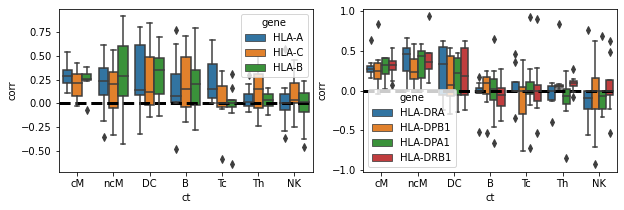

In [23]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
dat = long_df.query('type=="type1"', engine='python')
plt.plot([-0.5, 7.5], [0, 0], '--', lw=3, c='k')
sns.boxplot(x='ct', y='corr', hue='gene',data=dat)
plt.subplot(1, 2, 2)
dat = long_df.query('type=="type2"', engine='python')
plt.plot([-0.5, 7.5], [0, 0], '--', lw=3, c='k')
sns.boxplot(x='ct', y='corr', hue='gene',data=dat)

plt.savefig(fig_path + 'mhc_mean_corr_pbmc.pdf', bbox_inches='tight')

<AxesSubplot:xlabel='ct', ylabel='corr'>

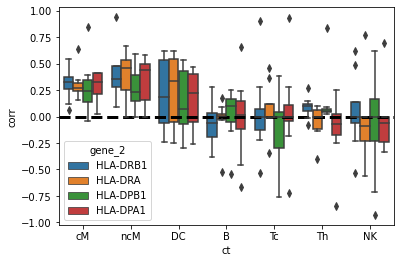

In [134]:
dat = long_df_mhc.query('type=="type2"', engine='python')
plt.plot([-0.5, 7.5], [0, 0], '--', lw=3, c='k')
sns.boxplot(x='ct', y='corr', hue='gene_2',data=dat)
# sns.stripplot(x='ct', y='corr', data=dat)


<AxesSubplot:xlabel='ct', ylabel='corr'>

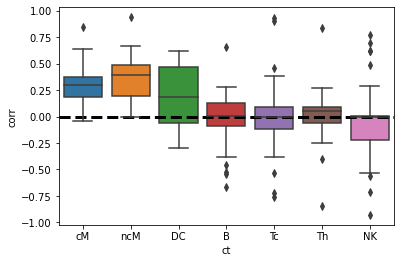

In [135]:
dat = long_df_mhc.query('type=="type2"', engine='python')
plt.plot([-0.5, 7.5], [0, 0], '--', lw=3, c='k')
sns.boxplot(x='ct', y='corr',data=dat)
# sns.stripplot(x='ct', y='corr', data=dat)


<AxesSubplot:xlabel='ct', ylabel='corr'>

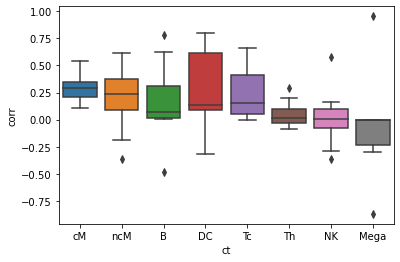

In [70]:
sns.boxplot(x='ct', y='corr', data=long_df.query('gene_2 == "HLA-A"').sort_values('ct', key=lambda x: x.map(order)))

In [53]:
long_df.head(10)

,gene_1,gene_2,corr,ct,ind
0,STAT1,IRF9,0.000000,CD8 T cells,101
1,STAT1,OASL,0.062618,CD8 T cells,101
2,STAT1,BST2,-0.690986,CD8 T cells,101
3,STAT1,HLA-DPA1,0.925834,CD8 T cells,101
4,STAT1,HLA-E,0.179389,CD8 T cells,101
5,STAT1,HLA-F,0.161079,CD8 T cells,101
6,STAT1,IFI27,-0.163841,CD8 T cells,101
7,STAT1,RSAD2,-0.294392,CD8 T cells,101
8,STAT1,OAS1,-0.447615,CD8 T cells,101
9,STAT1,GBP2,0.018208,CD8 T cells,101


### Get difference in STAT1 correlations

In [29]:
adata_cm = adata.copy()[(adata.obs['cell']=='CD14+ Monocytes')].copy()

/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [30]:
memento.create_groups(adata_cm, label_columns=['stim'])

In [31]:
memento.compute_1d_moments(adata_cm, min_perc_group=.7)

In [32]:
m, v, count = memento.get_1d_moments(adata_cm)

In [33]:
canonical_isgs = pd.read_csv('alpha_beta_reactome.txt', header=None)[0].tolist()
m, v, count = memento.get_1d_moments(adata_cm)
mhc_genes = m.query('gene.str.contains("HLA")', engine='python').gene.tolist()
tf_list = ['STAT1']

gene_list = adata_cm.var.index.tolist()
isgs = list(set(canonical_isgs) & set(gene_list))
target_list = list(set(isgs) | set(mhc_genes))

memento.compute_2d_moments(adata_cm, list(itertools.product(tf_list,target_list)))

In [34]:
memento.ht_2d_moments( 
    adata_cm, 
    formula_like='1 + stim',
    cov_column='stim', 
    num_boot=20000, 
    verbose=1,
    num_cpus=13)

[Parallel(n_jobs=13)]: Using backend LokyBackend with 13 concurrent workers.
[Parallel(n_jobs=13)]: Done  41 out of  41 | elapsed:   11.8s finished


In [35]:
corr_df = memento.get_2d_moments(adata_cm, groupby='stim')

/home/ssm-user/Github/scrna-parameter-estimation/dist/memento-0.0.5-py3.8.egg/memento/main.py:594: RuntimeWarning: invalid value encountered in true_divide
  groupby_corr[key] /= groupby_corr_count[key]


In [36]:
a = memento.get_2d_ht_result(adata_cm)

In [37]:
a

,gene_1,gene_2,corr_coef,corr_se,corr_pval
0,STAT1,IRF9,0.030395,0.118365,0.782661
1,STAT1,OASL,-0.018557,0.083808,0.820359
2,STAT1,BST2,0.150295,0.097275,0.122044
3,STAT1,HLA-DPA1,0.189959,0.066252,0.004400
4,STAT1,HLA-E,0.078201,0.087720,0.369232
5,STAT1,HLA-F,0.264111,0.107493,0.015499
6,STAT1,IFI27,0.030003,0.101622,0.793360
7,STAT1,HLA-DMA,0.234203,0.076193,0.003150
8,STAT1,RSAD2,0.225102,0.065451,0.002300
9,STAT1,OAS1,0.214891,0.089420,0.017799


In [ ]:
cts = [['ciliated']]
tps = ['3', '6', '9', '24', '48']
stims = ['beta']


for ct in cts:
    for tp in tps:
        for stim in stims:
                            
            print('starting', ct, tp, stim)

            adata_stim = adata.copy()[
                adata.obs.cell_type.isin(ct) & \
                adata.obs.stim.isin(['control', stim]) & \
                adata.obs.time.isin(['0',tp]), :].copy()
            time_converter={0:0, int(tp):1}
            adata_stim.obs['time_step'] = adata_stim.obs['time'].astype(int).apply(lambda x: time_converter[x])

            memento.create_groups(adata_stim, label_columns=['time_step', 'donor'])
            memento.compute_1d_moments(adata_stim, min_perc_group=.9)
            
            tf_list = ['STAT1']
            gene_list = adata_stim.var.index.tolist()
            
            isgs = list(set(canonical_isgs) & set(gene_list))
            
            target_list = list(set(isgs) | set(mhc_genes))
            
            memento.compute_2d_moments(adata_stim, list(itertools.product(tf_list,target_list)))

            moment_df = memento.get_2d_moments(adata_stim, groupby='time_step')
            moment_df.to_csv('/data_volume/ifn_hbec/tf_test/moments_{}_{}_{}_mhc1_20210321.csv'.format('-'.join(ct), stim, tp), index=False)

In [105]:
stim = 'beta'
ct = ['ciliated']

In [106]:
subset = adata[adata.obs['cell_type'].isin(ct) & adata.obs.stim.isin(['control', stim])].copy().copy()
memento.create_groups(subset, label_columns=['time', 'donor'])
memento.compute_1d_moments(subset, min_perc_group=.9)
mean_df = memento.get_1d_moments(subset, groupby='time')[0][['gene'] + ['time_' + str(i) for i in [0, 3, 6, 9, 24, 48]]]
var_df = memento.get_1d_moments(subset, groupby='time')[1][['gene'] + ['time_' + str(i) for i in [0, 3, 6, 9, 24, 48]]]

/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/ssm-user/Github/scrna-parameter-estimation/dist/memento-0.0.5-py3.8.egg/memento/estimator.py:105: RuntimeWarning: invalid value encountered in log


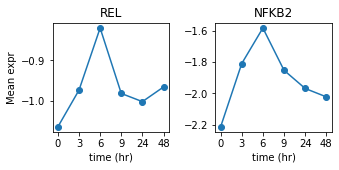

In [107]:
d = mean_df.query('gene.isin(["REL", "NFKB2"])', engine='python')
plt.figure(figsize=(5,2))
plt.subplots_adjust(wspace=0.4)
locs = [1, 2]
cs = [0, 2]
num=0
for idx, row in d.iterrows():
    plt.subplot(1,2,locs[num])
    plt.plot(row.values[1:], '-o')
    plt.title(row['gene'])
    plt.xticks([0, 1, 2, 3, 4, 5], ['0', '3', '6', '9', '24', '48'])
    if num == 0:
        plt.ylabel('Mean expr')
    plt.xlabel('time (hr)')
    num +=1

plt.savefig(fig_path + 'mhc_aux_mean.pdf', bbox_inches='tight')


In [113]:
d.values[2:].T

array([['HLA-B', 'B2M'],
       [1.9678467512130737, 4.1894755363464355],
       [2.6735966205596924, 4.4380927085876465],
       [2.807898759841919, 4.54669713973999],
       [2.552474021911621, 4.3481292724609375],
       [2.4727883338928223, 4.342992305755615],
       [2.166301965713501, 4.125378608703613]], dtype=object)

In [114]:
d

,gene,time_0,time_3,time_6,time_9,time_24,time_48
3221,HLA-A,1.656812,2.370405,2.487690,2.090583,2.035615,1.793220
3246,HLA-C,1.829254,2.479059,2.770877,2.521157,2.434578,2.142253
3247,HLA-B,1.967847,2.673597,2.807899,2.552474,2.472788,2.166302
6974,B2M,4.189476,4.438093,4.546697,4.348129,4.342992,4.125379


Text(0.5, 0, 'time (hr)')

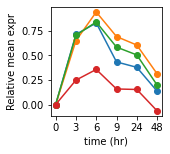

In [130]:
plt.figure(figsize=(2,2))
d = mean_df.query('gene.isin(["HLA-A", "HLA-B", "HLA-C", "B2M"])', engine='python').values[:,1:]
d = d - d[:, 0].reshape(-1,1)
plt.plot(d.T, '-o'); plt.ylabel('Relative mean expr')
plt.xticks([0, 1, 2, 3, 4, 5], ['0', '3', '6', '9', '24', '48']); plt.xlabel('time (hr)')

### Correlation of MHC I transcripts to STAT1

In [48]:
canonical_isgs = pd.read_csv('alpha_beta_reactome.txt', header=None)[0].tolist()
mhc_genes = ["HLA-A", "HLA-B", "HLA-C", "B2M"]

In [59]:
cts = [['ciliated']]
tps = ['3', '6', '9', '24', '48']
stims = ['beta']


for ct in cts:
    for tp in tps:
        for stim in stims:
                            
            print('starting', ct, tp, stim)

            adata_stim = adata.copy()[
                adata.obs.cell_type.isin(ct) & \
                adata.obs.stim.isin(['control', stim]) & \
                adata.obs.time.isin(['0',tp]), :].copy()
            time_converter={0:0, int(tp):1}
            adata_stim.obs['time_step'] = adata_stim.obs['time'].astype(int).apply(lambda x: time_converter[x])

            memento.create_groups(adata_stim, label_columns=['time_step', 'donor'])
            memento.compute_1d_moments(adata_stim, min_perc_group=.9)
            
            tf_list = ['STAT1']
            gene_list = adata_stim.var.index.tolist()
            
            isgs = list(set(canonical_isgs) & set(gene_list))
            
            target_list = list(set(isgs) | set(mhc_genes))
            
            memento.compute_2d_moments(adata_stim, list(itertools.product(tf_list,target_list)))

            moment_df = memento.get_2d_moments(adata_stim, groupby='time_step')
            moment_df.to_csv('/data_volume/ifn_hbec/tf_test/moments_{}_{}_{}_mhc1_20210321.csv'.format('-'.join(ct), stim, tp), index=False)

starting ['ciliated'] 3 beta


/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


starting ['ciliated'] 6 beta


/home/ssm-user/Github/scrna-parameter-estimation/dist/memento-0.0.5-py3.8.egg/memento/main.py:594: RuntimeWarning: invalid value encountered in true_divide


starting ['ciliated'] 9 beta
starting ['ciliated'] 24 beta
starting ['ciliated'] 48 beta


In [64]:
stim = 'beta'
ct = ['ciliated']
for tp in ['3', '6', '9', '24', '48']:
    
    moments = pd.read_csv('/data_volume/ifn_hbec/tf_test/moments_{}_{}_{}_mhc1_20210321.csv'.format('-'.join(ct), stim, tp)).rename(columns={'time_step_0':'time_0', 'time_step_1':'time_'+tp})
    
    if tp == '3':
        moment_df = moments[['gene_1', 'gene_2', 'time_0', 'time_3']].copy()
        
    else:
        moment_df = moment_df.merge(moments[['gene_1', 'gene_2', 'time_{}'.format(tp)]].copy(), on=['gene_1', 'gene_2'], how='inner')

In [149]:
plt.rcParams['axes.prop_cycle'].by_key()['color']

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [154]:
plt.rcParams['axes.prop_cycle'].by_key()['color'][1:5]

['#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

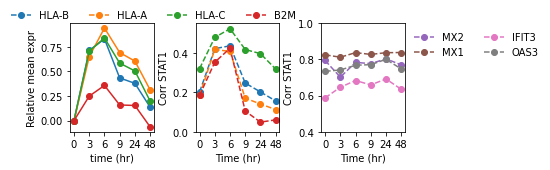

In [162]:
tf = 'STAT1'
plt.figure(figsize=(6,2))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1, 3, 1);

d = mean_df.query('gene.isin(["HLA-A", "HLA-B", "HLA-C", "B2M"])', engine='python').values[:,1:]
d = d - d[:, 0].reshape(-1,1)
plt.plot(d.T, '-o'); plt.ylabel('Relative mean expr')
plt.xticks([0, 1, 2, 3, 4, 5], ['0', '3', '6', '9', '24', '48']); plt.xlabel('time (hr)')

plt.subplot(1, 3, 2)
plt.plot(moment_df.query('gene_1 == "{}" & gene_2 in @mhc_genes'.format(tf)).values[:, 2:].T, '--o')
plt.xticks([0, 1, 2, 3, 4, 5], ['0', '3', '6', '9', '24', '48'])
plt.xlabel('Time (hr)'); plt.ylabel('Corr {}'.format(tf))
plt.ylim(0, 0.55)
plt.legend(moment_df.query('gene_1 == "{}" & gene_2 in @mhc_genes'.format(tf)).gene_2, frameon=False, ncol=4, bbox_to_anchor=(1.3,1.2))


select_isgs = ['MX1','MX2', 'OAS3', 'IFIT3', 'IFI2']
plt.subplot(1, 3, 3)
for i in range(4):
    plt.plot(moment_df.query('gene_1 == "{}" & gene_2 in @select_isgs'.format(tf)).values[i, 2:].T, '--o', color=plt.rcParams['axes.prop_cycle'].by_key()['color'][4+i])
plt.xticks([0, 1, 2, 3, 4, 5], ['0', '3', '6', '9', '24', '48'])
plt.xlabel('Time (hr)'); plt.ylabel('Corr {}'.format(tf))
plt.ylim(0.4, 1);
plt.legend(moment_df.query('gene_1 == "{}" & gene_2 in @select_isgs'.format(tf)).gene_2, frameon=False, ncol=2, bbox_to_anchor=(1,1))

plt.savefig(fig_path + 'mhc_mean_corr.pdf', bbox_inches='tight')

In [88]:
moment_df

,gene_1,gene_2,time_0,time_3,time_6,time_9,time_24,time_48
0,STAT1,IRF2,0.209428,0.345655,0.351665,0.403791,0.328545,0.330277
1,STAT1,HLA-B,0.201227,0.420494,0.434898,0.246592,0.201684,0.156004
2,STAT1,IFITM1,0.725632,0.648829,0.722967,0.712443,0.752257,0.719679
3,STAT1,IFITM2,0.428704,0.519050,0.551876,0.540026,0.512139,0.507080
4,STAT1,SOCS1,0.511312,0.388728,0.363513,0.474186,0.473442,0.504350
5,STAT1,IFITM3,0.740275,0.668623,0.738930,0.742767,0.746072,0.721912
6,STAT1,IRF7,0.635426,0.643951,0.687727,0.646674,0.672363,0.638066
7,STAT1,IFI6,0.581431,0.598028,0.678681,0.584084,0.500680,0.451282
8,STAT1,EGR1,0.036578,0.133676,0.208113,0.177444,0.209361,0.185099
9,STAT1,OAS2,0.901655,0.889552,0.885935,0.894787,0.874481,0.850491


In [89]:
select_isgs = ['MX1', 'OAS3', 'IFIT3', 'IFI2']

In [90]:
moment_df.query('gene_1 == "{}" & gene_2 in @select_isgs'.format(tf))

,gene_1,gene_2,time_0,time_3,time_6,time_9,time_24,time_48
14,STAT1,MX1,0.824872,0.811559,0.836918,0.827033,0.836616,0.837403
24,STAT1,IFIT3,0.587385,0.645985,0.683055,0.658808,0.691653,0.634757
50,STAT1,OAS3,0.733548,0.741300,0.767259,0.770594,0.799914,0.747048


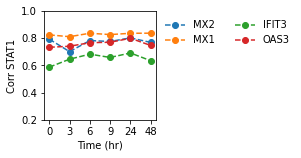

In [104]:
tf = 'STAT1'
select_isgs = ['MX1','MX2', 'OAS3', 'IFIT3', 'IFI2']
plt.figure(figsize=(2,2))
plt.plot(moment_df.query('gene_1 == "{}" & gene_2 in @select_isgs'.format(tf)).values[:, 2:].T, '--o')
plt.xticks([0, 1, 2, 3, 4, 5], ['0', '3', '6', '9', '24', '48'])
plt.xlabel('Time (hr)'); plt.ylabel('Corr {}'.format(tf))
plt.ylim(0.2, 1);
plt.legend(moment_df.query('gene_1 == "{}" & gene_2 in @select_isgs'.format(tf)).gene_2, frameon=False, ncol=2, bbox_to_anchor=(1,1))


# plt.savefig(fig_path + 'mhc_stat1_corr.pdf', bbox_inches='tight')

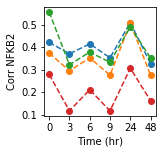

In [40]:
tf = 'NFKB2'
plt.figure(figsize=(2,2))
plt.plot(moment_df.query('gene_1 == "{}"'.format(tf)).values[:, 2:].T, '--o')
plt.xticks([0, 1, 2, 3, 4, 5], ['0', '3', '6', '9', '24', '48'])
plt.xlabel('Time (hr)'); plt.ylabel('Corr {}'.format(tf))
plt.savefig(fig_path + 'mhc_corr_NFKB2.pdf', bbox_inches='tight')


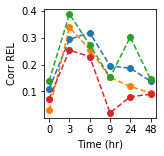

In [41]:
tf = 'REL'
plt.figure(figsize=(2,2))
plt.plot(moment_df.query('gene_1 == "{}"'.format(tf)).values[:, 2:].T, '--o')
plt.xticks([0, 1, 2, 3, 4, 5], ['0', '3', '6', '9', '24', '48'])
plt.xlabel('Time (hr)'); plt.ylabel('Corr {}'.format(tf))
plt.savefig(fig_path + 'mhc_corr_REL.pdf', bbox_inches='tight')


Text(0, 0.5, 'Corr RFX5')

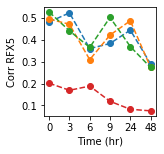

In [38]:
tf = 'RFX5'
plt.figure(figsize=(2,2))
plt.plot(moment_df.query('gene_1 == "{}"'.format(tf)).values[:, 2:].T, '--o')
plt.xticks([0, 1, 2, 3, 4, 5], ['0', '3', '6', '9', '24', '48'])
plt.xlabel('Time (hr)'); plt.ylabel('Corr {}'.format(tf))

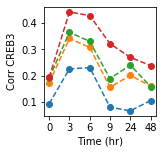

In [121]:
tf = 'CREB3'
plt.figure(figsize=(2,2))
plt.plot(moment_df.query('gene_1 == "{}"'.format(tf)).values[:, 2:].T, '--o')
plt.xticks([0, 1, 2, 3, 4, 5], ['0', '3', '6', '9', '24', '48'])
plt.xlabel('Time (hr)'); plt.ylabel('Corr {}'.format(tf))
plt.savefig(fig_path + 'mhc_creb3_corr.pdf', bbox_inches='tight')

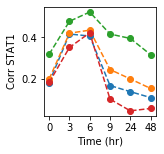

In [122]:
tf = 'STAT1'
plt.figure(figsize=(2,2))
plt.plot(moment_df.query('gene_1 == "{}"'.format(tf)).values[:, 2:].T, '--o')
plt.xticks([0, 1, 2, 3, 4, 5], ['0', '3', '6', '9', '24', '48'])
plt.xlabel('Time (hr)'); plt.ylabel('Corr {}'.format(tf))
plt.savefig(fig_path + 'mhc_stat1_corr.pdf', bbox_inches='tight')

In [242]:
tf = 'CREB3'

In [243]:
moment_df.query('gene_1 == "{}"'.format(tf))

,gene_1,gene_2,time_0,time_3,time_6,time_9,time_24,time_48
828,CREB3,HLA-A,0.092283,0.225511,0.230557,0.079328,0.065209,0.104553
829,CREB3,HLA-B,0.172263,0.341903,0.307946,0.155191,0.201031,0.159479
830,CREB3,HLA-C,0.190355,0.365602,0.330579,0.188595,0.240382,0.157265
831,CREB3,B2M,0.193022,0.443010,0.429344,0.321969,0.269825,0.238096


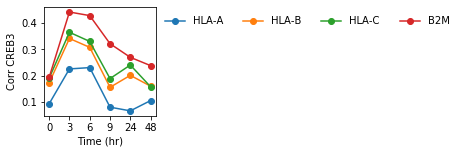

In [244]:
tf = 'CREB3'
plt.figure(figsize=(2,2))
plt.plot(moment_df.query('gene_1 == "{}"'.format(tf)).values[:, 2:].T, '-o')
plt.xticks([0, 1, 2, 3, 4, 5], ['0', '3', '6', '9', '24', '48'])
plt.xlabel('Time (hr)'); plt.ylabel('Corr {}'.format(tf))
plt.legend(['HLA-A', 'HLA-B', 'HLA-C', 'B2M'], ncol=4, frameon=False, bbox_to_anchor=(1,1))

Text(0, 0.5, 'Corr STAT6')

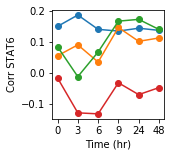

In [245]:
tf = 'STAT6'
plt.figure(figsize=(2,2))
plt.plot(moment_df.query('gene_1 == "{}"'.format(tf)).values[:, 2:].T, '-o')
plt.xticks([0, 1, 2, 3, 4, 5], ['0', '3', '6', '9', '24', '48'])
plt.xlabel('Time (hr)'); plt.ylabel('Corr {}'.format(tf))

Text(0, 0.5, 'Corr JUND')

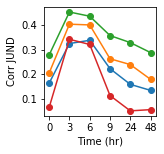

In [246]:
tf = 'JUND'
plt.figure(figsize=(2,2))
plt.plot(moment_df.query('gene_1 == "{}"'.format(tf)).values[:, 2:].T, '-o')
plt.xticks([0, 1, 2, 3, 4, 5], ['0', '3', '6', '9', '24', '48'])
plt.xlabel('Time (hr)'); plt.ylabel('Corr {}'.format(tf))

Text(0, 0.5, 'Corr ETS2')

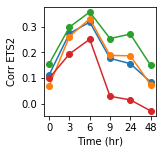

In [249]:
tf = 'ETS2'
plt.figure(figsize=(2,2))
plt.plot(moment_df.query('gene_1 == "{}"'.format(tf)).values[:, 2:].T, '-o')
plt.xticks([0, 1, 2, 3, 4, 5], ['0', '3', '6', '9', '24', '48'])
plt.xlabel('Time (hr)'); plt.ylabel('Corr {}'.format(tf))